# NEURAL NETWORKS AND DEEP LEARNING

---
A.A. 2021/22 (6 CFU) - Dr. Alberto Testolin, Dr. Umberto Michieli
---

##Lab. 01 - Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Model definition

## Define the true model and generate some noisy samples


Let's define a simple quadratic model

$$
y = a + b * x + c * x^2 + \text{noise}\\
Y=X \beta + \text{noise}\\
X=[1, x, x^2], \quad
\beta = 
\begin{bmatrix}
  a\\
  b\\
  c
\end{bmatrix} = 
\begin{bmatrix}
  -1.45\\
  1.12\\
  2.3
\end{bmatrix}
$$


In [2]:
def poly_model(x, beta, noise_std=0):
    """
    INPUT
        x: x vector
        beta: polynomial parameters
        noise_std: enable noisy sampling (gaussian noise, zero mean, noise_std std)
    """
    pol_order = len(beta)
    x_matrix = np.array([x**i for i in range(pol_order)]).transpose()
    print(x_matrix)
    y = np.matmul(x_matrix, beta)
    noise = np.random.randn(len(y)) * noise_std
    return y + noise

In [3]:
# TEST
beta = [-1.45, 1.12, 2.3]
x = np.array([1, 2, 3])
expected_y = np.array([1.97, 9.99, 22.61])
if np.array_equal(poly_model(x, beta, noise_std=0), expected_y):
  print('OK!')
else:
  print('Something is wrong')

[[1 1 1]
 [1 2 4]
 [1 3 9]]
OK!


Generate 10 training points and 10 test points. Add a gaussian noise with zero mean and 0.2 std (set a random seed for reproducible results).

[[1.         0.5507979  0.30337833]
 [1.         0.70814782 0.50147334]
 [1.         0.29090474 0.08462557]
 [1.         0.51082761 0.26094484]
 [1.         0.89294695 0.79735426]
 [1.         0.89629309 0.8033413 ]
 [1.         0.12558531 0.01577167]
 [1.         0.20724288 0.04294961]
 [1.         0.0514672  0.00264887]
 [1.         0.44080984 0.19431332]]
[[1.         0.28352508 0.08038647]
 [1.         0.69313792 0.48044017]
 [1.         0.44045372 0.19399948]
 [1.         0.15686774 0.02460749]
 [1.         0.54464902 0.29664255]
 [1.         0.78031476 0.60889113]
 [1.         0.30636353 0.09385861]
 [1.         0.22195788 0.0492653 ]
 [1.         0.38797126 0.1505217 ]
 [1.         0.93638365 0.87681434]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00100100e-03 1.00200300e-06]
 [1.00000000e+00 2.00200200e-03 4.00801202e-06]
 ...
 [1.00000000e+00 9.97997998e-01 9.96000004e-01]
 [1.00000000e+00 9.98998999e-01 9.97999000e-01]
 [1.00000000e+00 1.00000000e+00 1

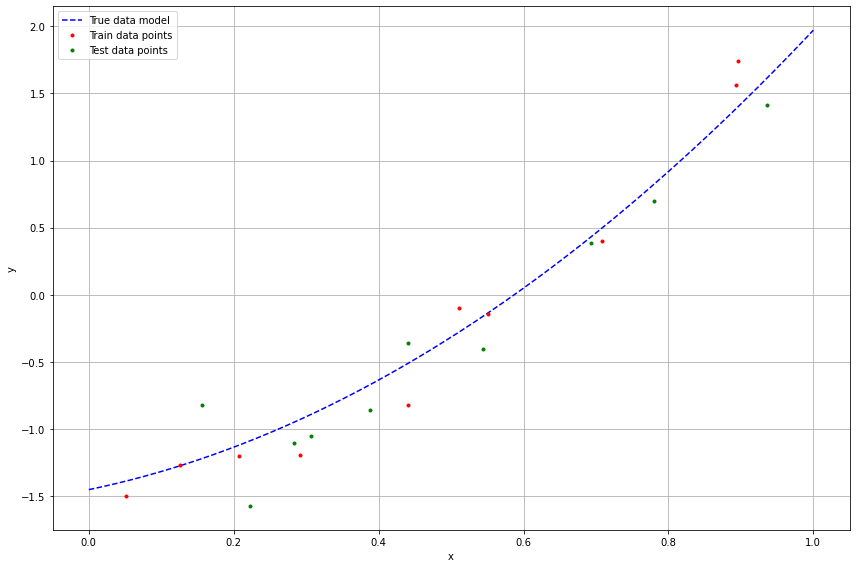

In [4]:
### True parameter values
beta_true = [-1.45, 1.12, 2.3]

### Set random seed
np.random.seed(3)

### Generate 10 train points
num_train_points = 10
x_train = np.random.rand(num_train_points)
y_train = poly_model(x_train, beta_true, noise_std=0.2)

### Generate 10 test points
num_test_points = 10
x_test = np.random.rand(num_test_points)
y_test = poly_model(x_test, beta_true, noise_std=0.2)

### Plot
plt.figure(figsize=(12,8))
x_highres = np.linspace(0,1,1000)
plt.plot(x_highres, poly_model(x_highres, beta_true), color='b', ls='--', label='True data model')
plt.plot(x_train, y_train, color='r', ls='', marker='.', label='Train data points')
plt.plot(x_test, y_test, color='g', ls='', marker='.', label='Test data points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Least Square Algorithm

ORDINARY LEAST SQUARE


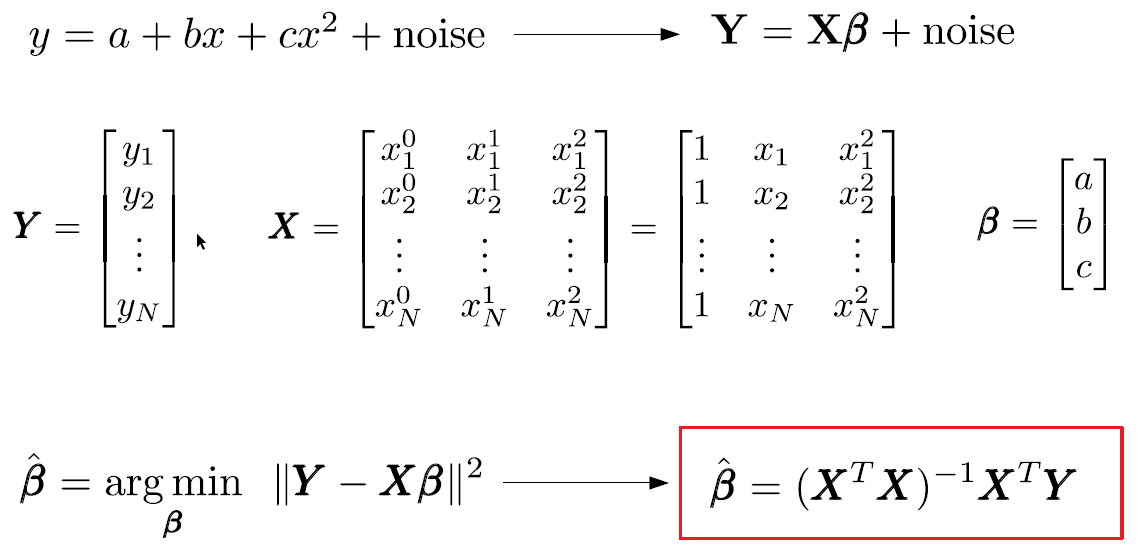

REGULARIZED LEAST SQUARE

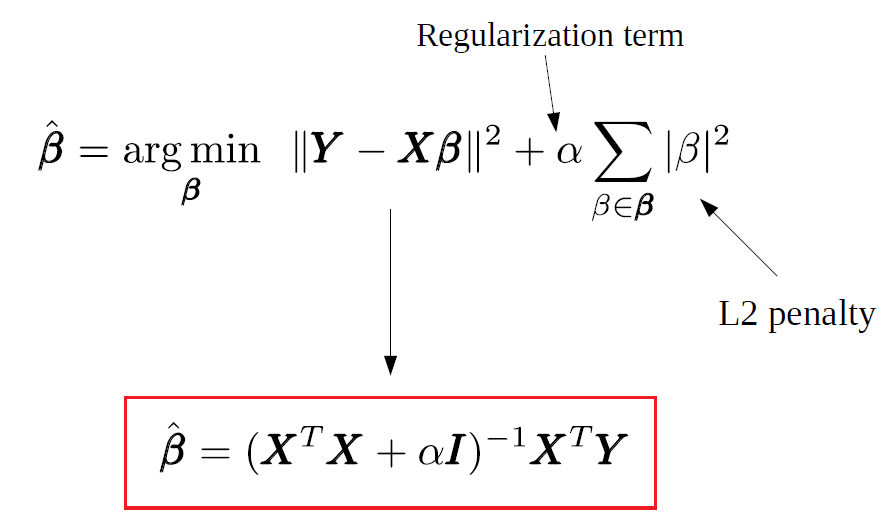

Let's define a function to implement the Regularized Least Square algorithm.

NOTE: OLS is RLS with $\alpha=0$


---


*HINTS*

`np.matmul(x1, x2)` -> Matrix product of two arrays

`np.linalg.inv(a)` -> Compute the inverse of a matrix

`a.transpose()` -> Reverse or permute the axes of an array

`a.squeeze()` -> Remove single-dimensional entries from the shape of an array

`np.identity(n)` -> Return the $n \times  n$ identity array

In [5]:
def least_squares(x, y, pol_order, reg_term):
    """
    Implement the least square algorithm to fit a polynomial function of order "pol_order"
    INPUT
        x: training x data
        y: training y data
        pol_order: order of the fitting polynomial function
        reg_term: regularization term
    OUTPUT
        beta_est: estimated parameter vector
    """
    
    # Create the Y matrix
    Y = y.reshape(len(y), 1)
    # Create the X matrix
    X = np.array([x**i for i in range(pol_order+1)]).transpose()
    
    # RLS algorithm
    gram_matrix = np.matmul(X.transpose(), X) + reg_term * np.identity(X.shape[1])
    gram_matrix_inv = np.linalg.inv(gram_matrix)
    temp = np.matmul(gram_matrix_inv, X.transpose())
    beta_est = np.matmul(temp, Y)
    
    return beta_est.squeeze()

## Ordinary Least Square (OLS) - No regularization - Model known

Let's suppose that we already know that the order of the underlying polynomial model is 2 (this is a very valuable **prior** information, and rarely happens in real world cases).

In [6]:
### Fit the model
beta_ols = least_squares(x_train, y_train, pol_order=2, reg_term=0)

print('True parameters', beta_true)
print('Inferred parameters', beta_ols)

True parameters [-1.45, 1.12, 2.3]
Inferred parameters [-1.47163667  0.39838972  3.44032748]


[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00100100e-03 1.00200300e-06]
 [1.00000000e+00 2.00200200e-03 4.00801202e-06]
 ...
 [1.00000000e+00 9.97997998e-01 9.96000004e-01]
 [1.00000000e+00 9.98998999e-01 9.97999000e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00100100e-03 1.00200300e-06]
 [1.00000000e+00 2.00200200e-03 4.00801202e-06]
 ...
 [1.00000000e+00 9.97997998e-01 9.96000004e-01]
 [1.00000000e+00 9.98998999e-01 9.97999000e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00]]


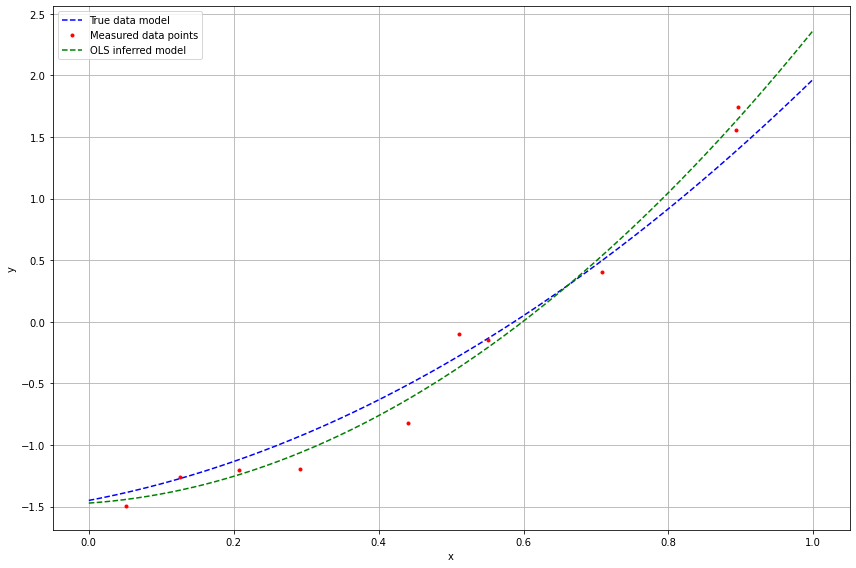

In [7]:
### Plot
plt.close('all')
plt.figure(figsize=(12,8))
x_highres = np.linspace(0,1,1000)
plt.plot(x_highres, poly_model(x_highres, beta_true), color='b', ls='--', label='True data model')
plt.plot(x_train, y_train, color='r', ls='', marker='.', label='Measured data points')
plt.plot(x_highres, poly_model(x_highres, beta_ols), color='g', ls='--', label='OLS inferred model')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
### Train and test loss
# Evaluate the average train MSE
y_train_ols = poly_model(x_train, beta_ols)
train_loss = np.mean((y_train_ols - y_train)**2)
print('Train loss:', train_loss)

# Evaluate the average test loss
y_test_ols = poly_model(x_test, beta_ols)
test_loss = np.mean((y_test_ols - y_test)**2)
print('Test loss:', test_loss)

[[1.         0.5507979  0.30337833]
 [1.         0.70814782 0.50147334]
 [1.         0.29090474 0.08462557]
 [1.         0.51082761 0.26094484]
 [1.         0.89294695 0.79735426]
 [1.         0.89629309 0.8033413 ]
 [1.         0.12558531 0.01577167]
 [1.         0.20724288 0.04294961]
 [1.         0.0514672  0.00264887]
 [1.         0.44080984 0.19431332]]
Train loss: 0.01766080007865898
[[1.         0.28352508 0.08038647]
 [1.         0.69313792 0.48044017]
 [1.         0.44045372 0.19399948]
 [1.         0.15686774 0.02460749]
 [1.         0.54464902 0.29664255]
 [1.         0.78031476 0.60889113]
 [1.         0.30636353 0.09385861]
 [1.         0.22195788 0.0492653 ]
 [1.         0.38797126 0.1505217 ]
 [1.         0.93638365 0.87681434]]
Test loss: 0.0803175047282694


As you can see the model is pretty close to the true one, considering the low number of training points. 

Any knowledge about the true model is **very** helpful!

## Ordinary Least Square (OLS) - No regularization - Model unknown

Now let's consider a more realistic scenario, where we know nothing about the true model. Since we do not have any information, we can try to fit a polynomial model with order 9.

In [9]:
### Fit the model with a higher order polynomial
beta_ols_ho = least_squares(x_train, y_train, pol_order=9, reg_term=0)

print('True parameters', beta_true)
print('Inferred parameters', beta_ols_ho)

True parameters [-1.45, 1.12, 2.3]
Inferred parameters [-1.88455289e+01  7.46742986e+02 -1.19051244e+04  9.68485380e+04
 -4.52935245e+05  1.28371858e+06 -2.23407657e+06  2.32764628e+06
 -1.32970717e+06  3.19824175e+05]


[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00100100e-03 1.00200300e-06]
 [1.00000000e+00 2.00200200e-03 4.00801202e-06]
 ...
 [1.00000000e+00 9.97997998e-01 9.96000004e-01]
 [1.00000000e+00 9.98998999e-01 9.97999000e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00100100e-03 1.00200300e-06 ... 1.00702808e-21
  1.00803612e-24 1.00904517e-27]
 [1.00000000e+00 2.00200200e-03 4.00801202e-06 ... 1.28899595e-19
  2.58057247e-22 5.16631125e-25]
 ...
 [1.00000000e+00 9.97997998e-01 9.96000004e-01 ... 9.86069874e-01
  9.84095760e-01 9.82125598e-01]
 [1.00000000e+00 9.98998999e-01 9.97999000e-01 ... 9.93014000e-01
  9.92019992e-01 9.91026979e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


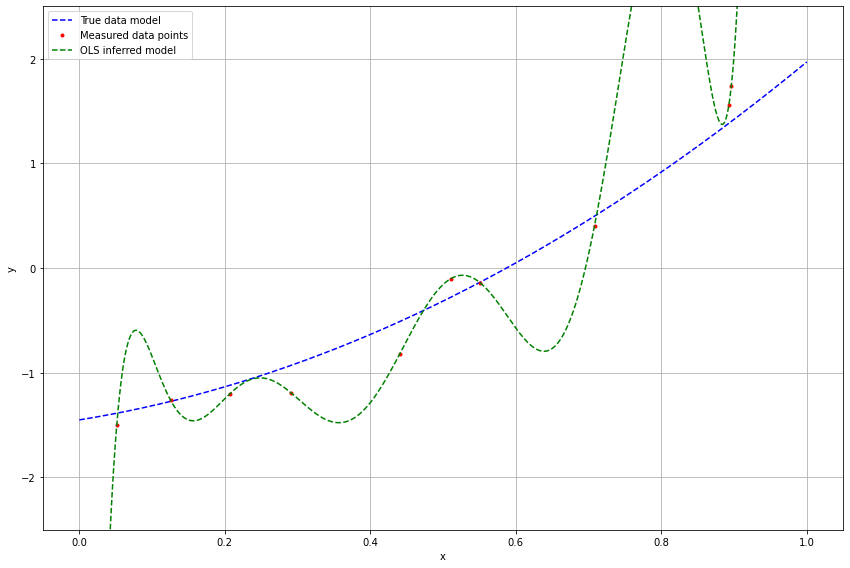

In [10]:
### Plot
plt.close('all')
plt.figure(figsize=(12,8))
x_highres = np.linspace(0,1,1000)
plt.plot(x_highres, poly_model(x_highres, beta_true), color='b', ls='--', label='True data model')
plt.plot(x_train, y_train, color='r', ls='', marker='.', label='Measured data points')
plt.plot(x_highres, poly_model(x_highres, beta_ols_ho), color='g', ls='--', label='OLS inferred model')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.tight_layout()
plt.ylim([-2.5,2.5])
plt.show()

In [11]:
### Train and test loss
# Evaluate the average train MSE
y_train_ols = poly_model(x_train, beta_ols_ho)
train_loss = np.mean((y_train_ols - y_train)**2)
print('Train loss:', train_loss)

# Evaluate the average test loss
y_test_ols = poly_model(x_test, beta_ols_ho)
test_loss = np.mean((y_test_ols - y_test)**2)
print('Test loss:', test_loss)

[[1.00000000e+00 5.50797903e-01 3.03378329e-01 1.67100148e-01
  9.20384108e-02 5.06945636e-02 2.79224593e-02 1.53796320e-02
  8.47106906e-03 4.66584707e-03]
 [1.00000000e+00 7.08147823e-01 5.01473339e-01 3.55117253e-01
  2.51475509e-01 1.78081834e-01 1.26108263e-01 8.93032921e-02
  6.32399318e-02 4.47832200e-02]
 [1.00000000e+00 2.90904739e-01 8.46255671e-02 2.46179785e-02
  7.16148661e-03 2.08331039e-03 6.06044866e-04 1.76301323e-04
  5.12868905e-05 1.49195995e-05]
 [1.00000000e+00 5.10827605e-01 2.60944842e-01 1.33297829e-01
  6.80922107e-02 3.47833809e-02 1.77683112e-02 9.07654385e-03
  4.63654916e-03 2.36847730e-03]
 [1.00000000e+00 8.92946954e-01 7.97354263e-01 7.11995061e-01
  6.35773821e-01 5.67712297e-01 5.06936967e-01 4.52667821e-01
  4.04208352e-01 3.60936617e-01]
 [1.00000000e+00 8.96293089e-01 8.03341301e-01 7.20029256e-01
  6.45357246e-01 5.78429240e-01 5.18442130e-01 4.64676098e-01
  4.16485975e-01 3.73293501e-01]
 [1.00000000e+00 1.25585310e-01 1.57716702e-02 1.98069010e

This is a typical case of **overfitting**. We are trying to fit a model that is much more complex than the real one.

As you can see, the polynomial coefficients found are very large.

To alleviate this effect, we can include a **regularization** term, which penalizes coefficients with large (quadratic) values.

---

*NOTE*

We are considering an L2 regularization (quadratic penalty term), which has an analitical solution.

We can also consider the absolute values of the coefficient in the regularization term (L1 regularization).

## Regularized Least Squares (RLS) - Model unknown


Let's fit the same model as before, but with a regularization term of $0.1$.

In [12]:
### Fit the model with a higher order polynomial
beta_rls = least_squares(x_train, y_train, pol_order=9, reg_term=0.1)

print('True parameters', beta_true)
print('Inferred parameters', beta_rls)

True parameters [-1.45, 1.12, 2.3]
Inferred parameters [-1.40193978  1.11945046  1.00587865  0.69763917  0.46265449  0.31011377
  0.21529531  0.15648382  0.11926821  0.09488916]


[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00100100e-03 1.00200300e-06]
 [1.00000000e+00 2.00200200e-03 4.00801202e-06]
 ...
 [1.00000000e+00 9.97997998e-01 9.96000004e-01]
 [1.00000000e+00 9.98998999e-01 9.97999000e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00100100e-03 1.00200300e-06 ... 1.00702808e-21
  1.00803612e-24 1.00904517e-27]
 [1.00000000e+00 2.00200200e-03 4.00801202e-06 ... 1.28899595e-19
  2.58057247e-22 5.16631125e-25]
 ...
 [1.00000000e+00 9.97997998e-01 9.96000004e-01 ... 9.86069874e-01
  9.84095760e-01 9.82125598e-01]
 [1.00000000e+00 9.98998999e-01 9.97999000e-01 ... 9.93014000e-01
  9.92019992e-01 9.91026979e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


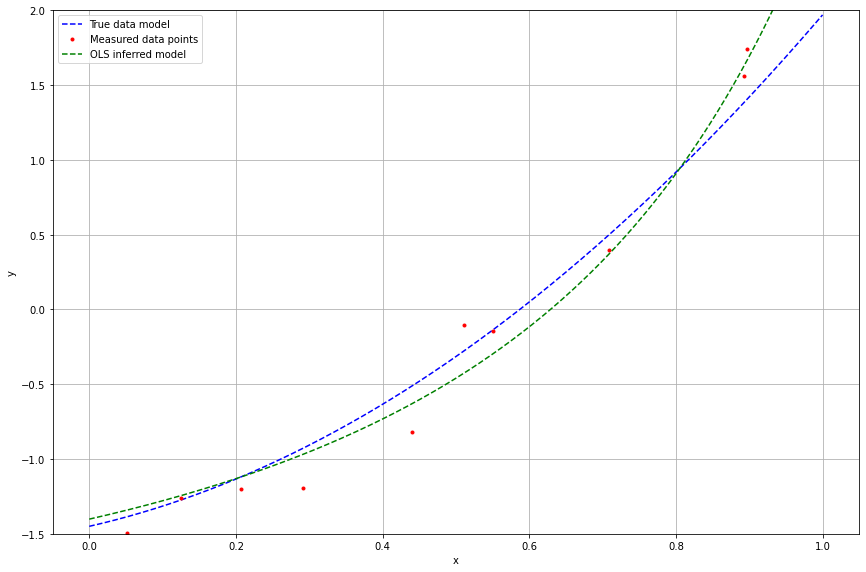

In [13]:
### Plot
plt.close('all')
plt.figure(figsize=(12,8))
x_highres = np.linspace(0,1,1000)
plt.plot(x_highres, poly_model(x_highres, beta_true), color='b', ls='--', label='True data model')
plt.plot(x_train, y_train, color='r', ls='', marker='.', label='Measured data points')
plt.plot(x_highres, poly_model(x_highres, beta_rls), color='g', ls='--', label='OLS inferred model')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.tight_layout()
plt.ylim([-1.5,2])
plt.show()

In [14]:
### Train and test loss
# Evaluate the average train MSE
y_train_ols = poly_model(x_train, beta_rls)
train_loss = np.mean((y_train_ols - y_train)**2)
print('Train loss:', train_loss)

# Evaluate the average test loss
y_test_ols = poly_model(x_test, beta_rls)
test_loss = np.mean((y_test_ols - y_test)**2)
print('Test loss:', test_loss)

[[1.00000000e+00 5.50797903e-01 3.03378329e-01 1.67100148e-01
  9.20384108e-02 5.06945636e-02 2.79224593e-02 1.53796320e-02
  8.47106906e-03 4.66584707e-03]
 [1.00000000e+00 7.08147823e-01 5.01473339e-01 3.55117253e-01
  2.51475509e-01 1.78081834e-01 1.26108263e-01 8.93032921e-02
  6.32399318e-02 4.47832200e-02]
 [1.00000000e+00 2.90904739e-01 8.46255671e-02 2.46179785e-02
  7.16148661e-03 2.08331039e-03 6.06044866e-04 1.76301323e-04
  5.12868905e-05 1.49195995e-05]
 [1.00000000e+00 5.10827605e-01 2.60944842e-01 1.33297829e-01
  6.80922107e-02 3.47833809e-02 1.77683112e-02 9.07654385e-03
  4.63654916e-03 2.36847730e-03]
 [1.00000000e+00 8.92946954e-01 7.97354263e-01 7.11995061e-01
  6.35773821e-01 5.67712297e-01 5.06936967e-01 4.52667821e-01
  4.04208352e-01 3.60936617e-01]
 [1.00000000e+00 8.96293089e-01 8.03341301e-01 7.20029256e-01
  6.45357246e-01 5.78429240e-01 5.18442130e-01 4.64676098e-01
  4.16485975e-01 3.73293501e-01]
 [1.00000000e+00 1.25585310e-01 1.57716702e-02 1.98069010e

The result is much better! Keep in mind that we are fitting a polynomial model of **order 9** with data generated by a polynomial model of **order 2** , still achieving good results.

# The generalization problem

But what happens if we extend the model just trained outside the range of the training points?

Let's try.

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.00200200e-03 4.00801202e-06]
 [1.00000000e+00 4.00400400e-03 1.60320481e-05]
 ...
 [1.00000000e+00 1.99599600e+00 3.98400002e+00]
 [1.00000000e+00 1.99799800e+00 3.99199600e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.00200200e-03 4.00801202e-06 ... 1.28899595e-19
  2.58057247e-22 5.16631125e-25]
 [1.00000000e+00 4.00400400e-03 1.60320481e-05 ... 1.64991481e-17
  6.60626552e-20 2.64515136e-22]
 ...
 [1.00000000e+00 1.99599600e+00 3.98400002e+00 ... 1.26216944e+02
  2.51928515e+02 5.02848306e+02]
 [1.00000000e+00 1.99799800e+00 3.99199600e+00 ... 1.27105792e+02
  2.53957118e+02 5.07405813e+02]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 ... 1.28000000e+02
  2.56000000e+02 5.12000000e+02]]


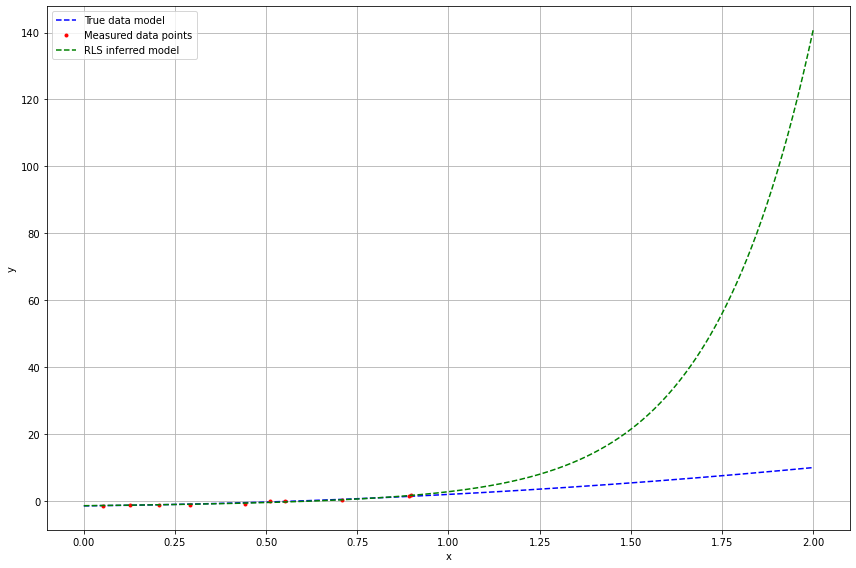

In [15]:
### Plot
plt.close('all')
plt.figure(figsize=(12,8))
x_highres = np.linspace(0,2,1000)
plt.plot(x_highres, poly_model(x_highres, beta_true), color='b', ls='--', label='True data model')
plt.plot(x_train, y_train, color='r', ls='', marker='.', label='Measured data points')
plt.plot(x_highres, poly_model(x_highres, beta_rls), color='g', ls='--', label='RLS inferred model')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

As you can see, the further we are from the region where we have training data, the worse the trained model approximates the true one. The inferred model does not **generalize** well outside the training space.

Typically, simpler models generalize better than complex models. When two models perform the same, the best option is (almost) always to choose the simplest of the two.

# Parameter optimization

In the previous training we used a regularization term $\alpha=0.1$. But how we choose this type of parameters?

Most machine learning/deep learning algorithms have several hyper-parameters that considerably affect the results. To find a good set of hyper-parameters we need an additional set of data, referred to as **validation** data. Hyper-parameters are typically chosen by minimizing the error on the validation set (or better by performing a cross-validation).

**TO SUMMARIZE:**

*   **Always divide your dataset in a training set and a test set.**
*   **Further divide your training set to have a validation set for hyper-parameter optimization (or perform a cross-validation)**
*   **Never touch the test set during the optimization (this is cheating!). It can be used only at the end for the final test.**

